In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# yahoo Finance API library (useful?)
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [60]:
# current stock Interests: GPU, Car Scene with Tesla, Comparing companies such as Google, Microsoft, Amazon, and Meta, Streaming services such as Netflix etc...

# Good Guide: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm#4.-What-was-the-correlation-between-different-stocks-closing-prices? 

# Kaggle Dataset Stock History Choices this week: 
# Nvidia = https://www.kaggle.com/datasets/kalilurrahman/nvidia-stock-data-latest-and-updated (might be too much and only goes up to 2021)
# Tesla = https://www.kaggle.com/datasets/muhammadibrahimqasmi/tesla-stock-insights-and-predictions/data 
# Google = https://www.kaggle.com/datasets/muhammadibrahimqasmi/google-stock-dataset 

# Possible list of Stock apis: https://patrickalphac.medium.com/stock-api-landscape-5c6e054ee631
# Yahoo Finance?

# Current Stocks API: https://finnhub.io 

# S&P 500 Current stocks daily updated: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks/data 

In [61]:
# can do baseline data analysis for now but is suggested to use up to date data next week around
# Yahoo Finance?
# how to update csv file with api data

# Stock Market Analysis between AWS, Google, Amazon, Microsoft, Apple, Meta

# Analysis between CPU manufacturers Intel and AMD

# Nvidia

# Analysis betweenn E-Car Manufacturers, Tesla as one

In [62]:
# Nvidia Analysis, past 5 years
# df_nvidia = pd.read_csv("NvidiaStock/NVDA.csv")
from datetime import datetime

Stock = 'NVDA'

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

In [63]:
df_nvidia = globals()[Stock] = yf.download(Stock, start, end)

[*********************100%%**********************]  1 of 1 completed


## Data Cleaning

In [64]:
df_nvidia.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,151.250000,152.467499,147.875000,148.367493,148.078033,20391200
2021-05-04,146.372498,146.375000,140.102493,143.512497,143.232483,40532400
2021-05-05,147.089996,148.134995,143.875000,144.585007,144.302872,29202400
2021-05-06,144.952499,145.712494,142.179993,145.229996,144.946625,19338000
2021-05-07,148.082504,149.707504,146.717499,148.122498,147.833481,22932800


In [65]:
df_nvidia.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-25,788.679993,833.229980,782.229980,826.320007,826.320007,42464100
2024-04-26,838.179993,883.309998,833.869995,877.349976,877.349976,55101100
2024-04-29,875.950012,879.919983,852.659973,877.570007,877.570007,38897100
2024-04-30,872.400024,888.190002,863.000000,864.020020,864.020020,36370900
2024-05-01,850.770020,860.000000,812.549988,830.409973,830.409973,55773000


In [66]:
# Maybe grab the Date and highest price it was at during each date?
df_nvidia.info()

# Open: Opening Price of a stock, first price when stock market opens
# High: Highest price the stock was at during trading day
# Low: Lowest price the stock was at duirng trading day
# Close: Closing price of a stock, final price before trades close
# adj Close: this is the closing price of a stock adjusted for factors such as dividends, stock splits, and other corporate actions that may affect the price
# Volume: The total number of shares or contracts traded during the period

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2021-05-03 to 2024-05-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       755 non-null    float64
 1   High       755 non-null    float64
 2   Low        755 non-null    float64
 3   Close      755 non-null    float64
 4   Adj Close  755 non-null    float64
 5   Volume     755 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [67]:
df_nvidia.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Analysis

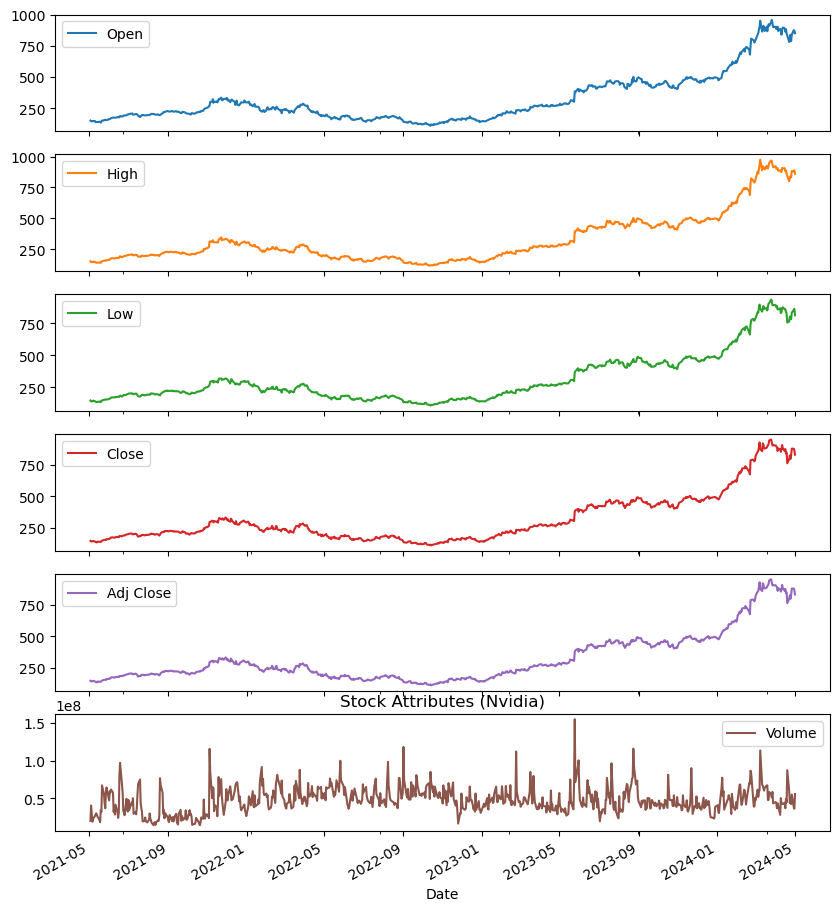

In [68]:
df_nvidia.plot(subplots = True, figsize=(10,12))
plt.title("Stock Attributes (Nvidia)")
plt.show()

It can be seen that the trends between all data points aside volume are largely the same. Too little dilation from each other, this could mean that Nvidia has been on a steady rise throughout Covid but had a massive spike near 2024.

In [69]:
fig = px.line(df_nvidia, y=['Open', 'Close', 'High', 'Low', 'Adj Close'], title = 'Date vs Stock Prices')
fig.show()

There was a spike in November 2021 that lines up with the rise of AI and ChatGPT. With GPUs being a major asset to running and processing AI. Judging from the chart, January 2022 to September 2022 was Nvidia's 52 week low after the US imposed restrictions on the export of AI chips to China and Russia. The 239% rise in 2023 would be due to the fervor over generative AI reaching a peak height. Nvidia skyrocketed again in 2024 over further AI demand. There are high chances that Nvidia may reach the $1000 stock price soon if it continues to rise. Right now residing between $900 to $800 per stock.

In [70]:
fig = px.line(df_nvidia, y=['Volume'], title = 'Date vs Stock Prices')
fig.show()

We see two noticeable spikes in trades in May 2023 and September 2020. December 2020 has the lowest time in trades between 2019 and 2024. In 2024, the high cost in the stock may be the reason as to why it is so low in trade volume.

In [71]:
# Nvidia Candlestick Chart

fig = go.Figure(data=[go.Candlestick(x=df_nvidia.index, open=df_nvidia['Open'], high=df_nvidia['High'], low=df_nvidia['Low'], close=df_nvidia['Close'])])

fig.update_layout(title='Nvidia Stock Price Candlestick Chart', xaxis_title='Date', yaxis_title='Stock Price (USD)')
fig.show()

Judging from the stagnation and possible decline in the stock, it may be a good time to invest into the stock before it has the chance to rise again and before the AI boom calms down further.

<Axes: xlabel='Adj Close', ylabel='Volume'>

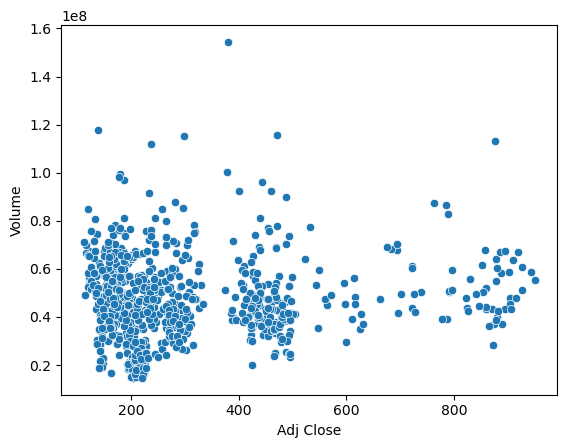

In [72]:
sns.scatterplot(df_nvidia, x='Adj Close', y='Volume')

High volume of trades were in the lower area, but sudden rise mainly occurred during 2023. The highest volume of purchases during a trading session happening when stock price was below 400 dollars, less trades seemed to occur after.

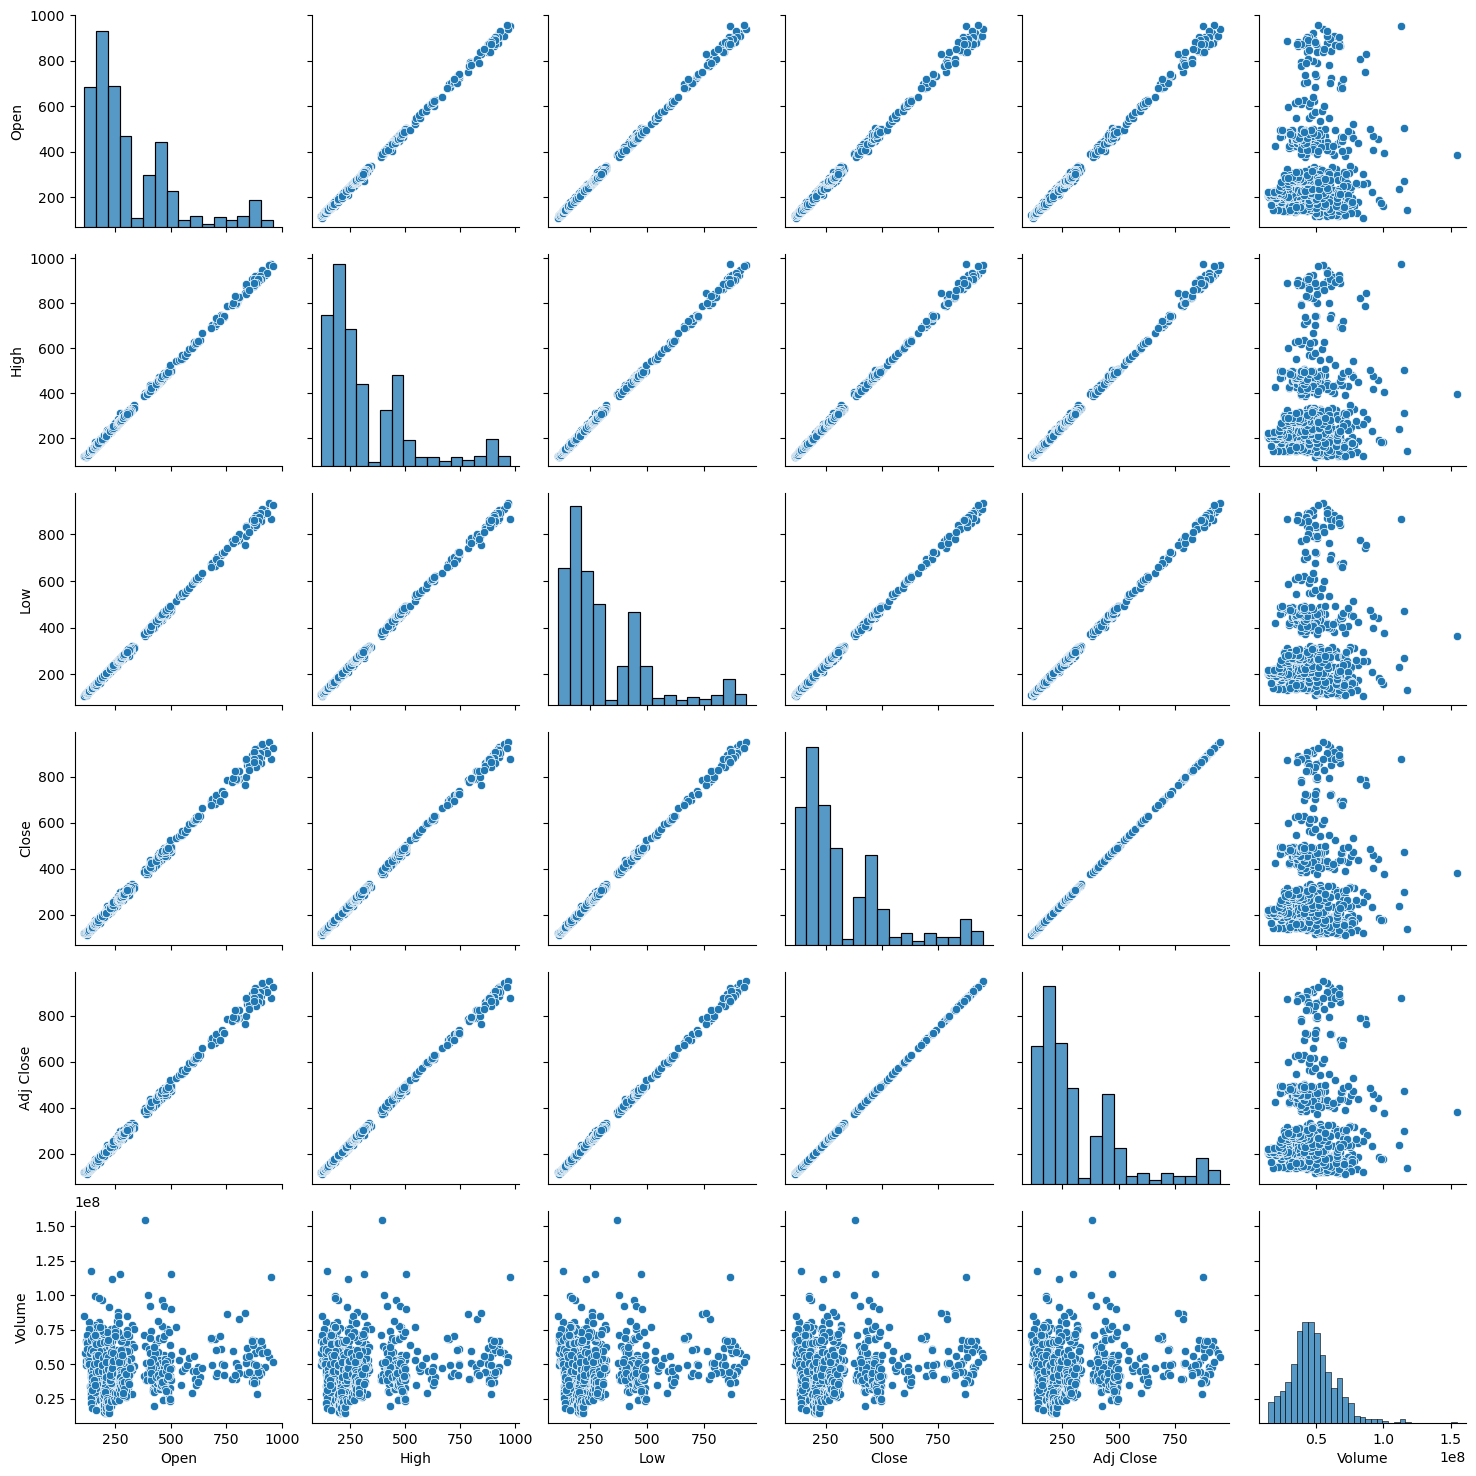

<Figure size 1000x800 with 0 Axes>

In [96]:
sns.pairplot(df_nvidia)
plt.figure(figsize=(10,8))
plt.show()

## Prediction Model

In [75]:
X = df_nvidia[['High', 'Low', 'Adj Close']]  # Features
y = df_nvidia['Open']  # Target variable

In [76]:
opening_price = df_nvidia[['Open']].values

In [77]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(opening_price)

In [78]:
# window size for sequences
window_size = 30 #(window of values that can be looked back on)

In [79]:
# Create sequences
X, y = [], []
for i in range(len(scaled_prices) - window_size):
    X.append(scaled_prices[i:i+window_size])
    y.append(scaled_prices[i+window_size])

In [80]:
X, y = np.array(X), np.array(y)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Define the LSTM model
model = Sequential([
    LSTM(units=128, activation='relu', input_shape=(window_size, 1), return_sequences=True),
    LSTM(units=64, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

In [83]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
19/19 [==============================] - 4s 56ms/step - loss: 0.0247 - val_loss: 0.0022
Epoch 2/100
19/19 [==============================] - 1s 29ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/100
19/19 [==============================] - 1s 29ms/step - loss: 0.0011 - val_loss: 8.2198e-04
Epoch 4/100
19/19 [==============================] - 1s 29ms/step - loss: 0.0010 - val_loss: 8.2937e-04
Epoch 5/100
19/19 [==============================] - 1s 29ms/step - loss: 0.0010 - val_loss: 7.2243e-04
Epoch 6/100
19/19 [==============================] - 1s 29ms/step - loss: 8.6833e-04 - val_loss: 7.7011e-04
Epoch 7/100
19/19 [==============================] - 1s 30ms/step - loss: 9.2590e-04 - val_loss: 7.5864e-04
Epoch 8/100
19/19 [==============================] - 1s 30ms/step - loss: 7.6549e-04 - val_loss: 5.9605e-04
Epoch 9/100
19/19 [==============================] - 1s 31ms/step - loss: 8.4546e-04 - val_loss: 6.0261e-04
Epoch 10/100
19/19 [==============================] - 1s

In [84]:
# Evaluate the model on testing data
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

5/5 [==============================] - 0s 9ms/step - loss: 7.0766e-04
Test Loss: 0.0007076638285070658


In [85]:
y_pred = model.predict(X_test)

5/5 [==============================] - 1s 10ms/step


In [86]:
scaled_pred = scaler.inverse_transform(y_pred)

In [87]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared (R2) Score:', r2)


Mean Squared Error: 0.000707664141004189
Root Mean Squared Error: 0.02660195746564882
R-squared (R2) Score: 0.9872188545101344


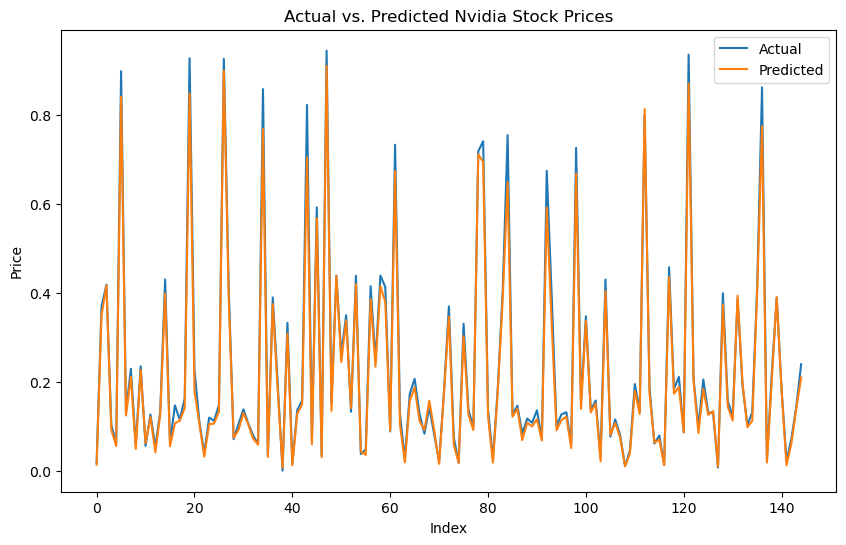

In [88]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Nvidia Stock Prices')
plt.legend()
plt.show()

## Prediction

In [89]:
def preprocess_input_data(data):
    price = data['Price']
    #scale the price using min max scaling
    scaled_price = scaler.fit_transform([[price]])[0][0] #fit and transform
    return scaled_price

In [90]:
next_day_data = {
    'Price': '830.41' # historical price data from the day before
}

scaled_input_data = preprocess_input_data(next_day_data)

In [91]:
# Reshape the input data to match the model's input shape
reshaped_input_data = np.array([scaled_input_data]).reshape(1, 1, 1)

In [92]:
# Generate prediction for the next day's price
predicted_price = model.predict(reshaped_input_data)

1/1 [==============================] - 0s 471ms/step


In [93]:
# Inverse-transform the prediction to get the predicted price in the original scale
predicted_price_original_scale = scaler.inverse_transform(predicted_price)[0][0]

In [94]:
print('Predicted Price for the Next Day:', predicted_price_original_scale)

Predicted Price for the Next Day: 830.4357


In [95]:
# Assuming 'model' is your trained LSTM model and 'scaler' is your MinMaxScaler

# Define the number of days to predict
num_days_to_predict = 5  # Adjust as needed

# Initialize a list to store predicted prices
predicted_prices = []

# Get the last known price from your data
last_known_price = 830.41  # Adjust this based on your actual last known price

# Loop to predict future days
for _ in range(num_days_to_predict):
    # Scale the last known price using your MinMaxScaler
    scaled_input_data = scaler.transform([[last_known_price]])
    
    # Reshape the input data for prediction
    reshaped_input_data = np.array([scaled_input_data]).reshape(1, 1, 1)
    
    # Make a prediction using the LSTM model
    predicted_price = model.predict(reshaped_input_data)
    
    # Inverse transform the predicted price to the original scale
    predicted_price_original_scale = scaler.inverse_transform(predicted_price)[0][0]
    
    # Append the predicted price to the list
    predicted_prices.append(predicted_price_original_scale)
    
    # Update the last known price for the next iteration (optional)
    last_known_price = predicted_price_original_scale

# Print or use the predicted prices as needed
print('Predicted Prices for the Next', num_days_to_predict, 'Days:', predicted_prices)


1/1 [==============================] - 0s 18ms/step
Predicted Prices for the Next 5 Days: [830.4357, 830.4472, 830.4528, 830.45557, 830.4569]


Under my analysis, Nvidia would be ideal as a long-term investment. With its boom coming from the AI boom in late 2021. It has had moments of reaching lows such as in 2022 by outside factors such as the government. But early 2024 has seen the company have a large boom in its stock price, soaring to reach more than $900 dollars a few points in time in 2024. It may be an opportune time soon due to an uninspiring announcement by AMD that had also affected Nvidia too in 5/1/24, causing the stock to have a sudden drop however there is a high chance for it to continue to outperform for the rest of 2024. Predictions from stock prices show a gradual increase over time without the inclusion of outside factors such as announcements from other companies that may cause unpredictable drops or rises in the stock price. The amount to be invested will be $100,000, a 10% of my budget to see a more immediate impact for the project.